In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Temperature

In [2]:
df_temp = pd.read_csv(
    "../data/NSW/temperature_nsw.csv", names=["location", "datetime", "temp"], header=0
)

In [3]:
df_temp.head()

,location,datetime,temp
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6


In [4]:
# Check for missing values
print("Number of missing value")
df_temp.isnull().sum()

Number of missing value


location    0
datetime    0
temp        0
dtype: int64

No missing value

In [5]:
# Convert the datetime a datetime object
df_temp["datetime"] = pd.to_datetime(df_temp["datetime"], format="%d/%m/%Y %H:%M")

In [6]:
df_temp.describe()

,temp
count,220326.000000
mean,17.418827
std,5.849763
min,-1.300000
25%,13.400000
50%,17.700000
75%,21.300000
max,44.700000


from a glance, doesn't look like there is any outlier that needs to be removed from the data. We will use a boxplot to confirm this.

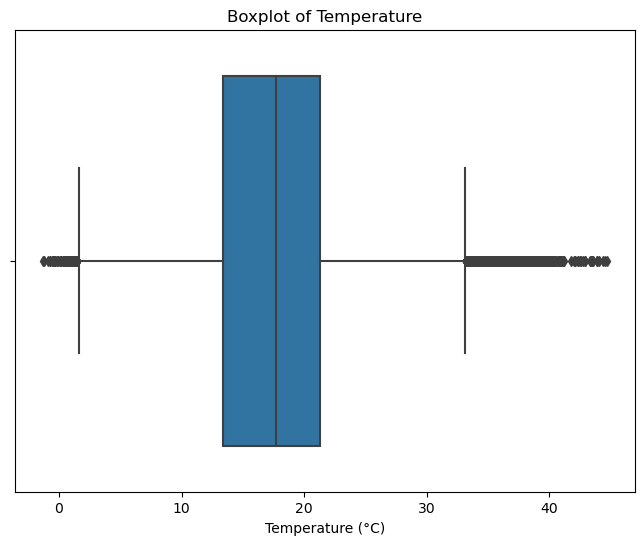

In [7]:
# Box plot of temperature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp, x="temp")
plt.title("Boxplot of Temperature")
plt.xlabel("Temperature (°C)")
plt.show()

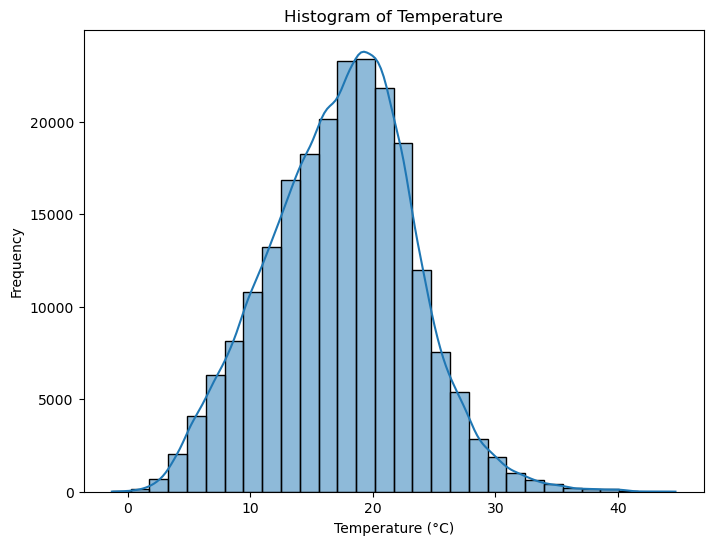

In [8]:
# Histogram of temperature
plt.figure(figsize=(8, 6))
sns.histplot(df_temp["temp"], bins=30, kde=True)
plt.title("Histogram of Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

Temperature seems relatively normally distributed

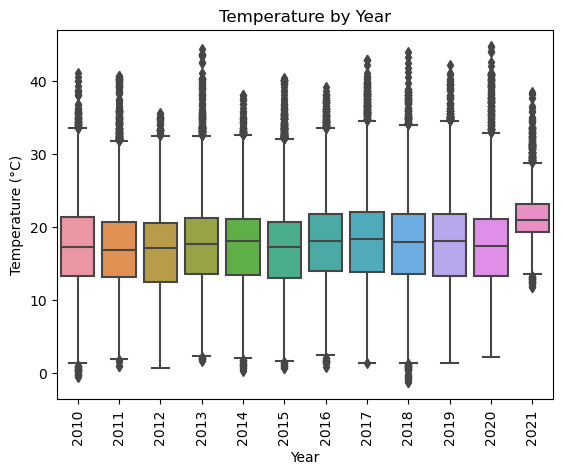

In [9]:
# Box plot of each year's temperature
df_temp["year"] = df_temp["datetime"].dt.year
ax = sns.boxplot(data=df_temp, x="year", y="temp")
plt.title("Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [10]:
# Checking the latest entries of the data
df_temp.head(-1)

,location,datetime,temp,year
0,Bankstown,2010-01-01 00:00:00,23.1,2010
1,Bankstown,2010-01-01 00:01:00,23.1,2010
2,Bankstown,2010-01-01 00:30:00,22.9,2010
3,Bankstown,2010-01-01 00:50:00,22.7,2010
4,Bankstown,2010-01-01 01:00:00,22.6,2010
...,...,...,...,...
220320,Bankstown,2021-03-17 22:30:00,19.5,2021
220321,Bankstown,2021-03-17 23:00:00,19.1,2021
220322,Bankstown,2021-03-17 23:20:00,19.0,2021
220323,Bankstown,2021-03-17 23:30:00,18.8,2021


- Temperature seems very stable year to year, with a central range around 20°C
- Outliers (extreme high and low temperatures) are consistently present every year, indicating occasional temperature extremes
- 2021 only has data up to March, which most likely is the reason for its different distribution compared to previous years. Prehaps we should remove the 2021 data

We will only use data up to 2020 for the hourly analysis to avoid altering the overall result

In [11]:
up_to_2020 = df_temp[df_temp["year"] < 2021]
up_to_2020.head()

,location,datetime,temp,year
0,Bankstown,2010-01-01 00:00:00,23.1,2010
1,Bankstown,2010-01-01 00:01:00,23.1,2010
2,Bankstown,2010-01-01 00:30:00,22.9,2010
3,Bankstown,2010-01-01 00:50:00,22.7,2010
4,Bankstown,2010-01-01 01:00:00,22.6,2010


C:\Users\Eugene\AppData\Local\Temp\ipykernel_29604\2998118238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_to_2020["hour"] = up_to_2020["datetime"].dt.hour


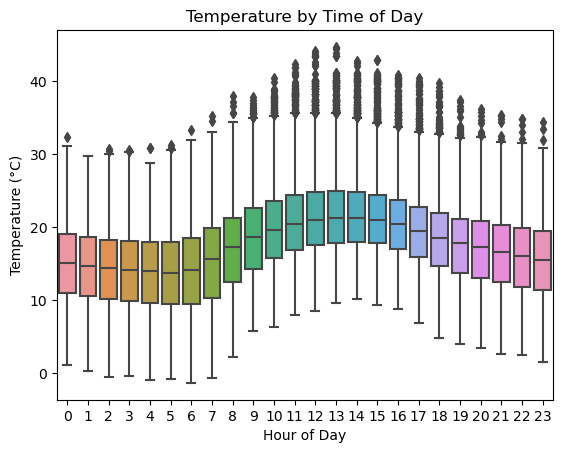

In [12]:
up_to_2020["hour"] = up_to_2020["datetime"].dt.hour
ax = sns.boxplot(data=up_to_2020, x="hour", y="temp")
plt.title("Temperature by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Temperature (°C)")
plt.show()

- The plot clearly reflects the daily heating cycle, where temperatures rise and fall predictably with solar activity.
- The most variable temperatures occur during the hottest part of the day, with a broader range of temperatures and more outliers.
- Cooler and more stable temperatures are seen in the early morning and late evening, as indicated by the smaller IQR and fewer outliers.

## Demand

In [13]:
df_demand = pd.read_csv(
    "../data/NSW/totaldemand_nsw.csv", names=["datetime", "demand"], header=0
)

In [14]:
df_demand.head()

,datetime,demand
0,1/1/2010 0:00,8038.00
1,1/1/2010 0:30,7809.31
2,1/1/2010 1:00,7483.69
3,1/1/2010 1:30,7117.23
4,1/1/2010 2:00,6812.03


In [15]:
# Convert the datetime a datetime object
df_demand["datetime"] = pd.to_datetime(df_demand["datetime"], format="%d/%m/%Y %H:%M")

In [16]:
df_demand.head()

,datetime,demand
0,2010-01-01 00:00:00,8038.00
1,2010-01-01 00:30:00,7809.31
2,2010-01-01 01:00:00,7483.69
3,2010-01-01 01:30:00,7117.23
4,2010-01-01 02:00:00,6812.03


In [17]:
# Check for missing values
df_demand.isnull().sum()

datetime    0
demand      0
dtype: int64

In [18]:
df_demand.describe()

,demand
count,196513.000000
mean,8113.145859
std,1299.532774
min,5074.630000
25%,7150.070000
50%,8053.230000
75%,8958.550000
max,14579.860000


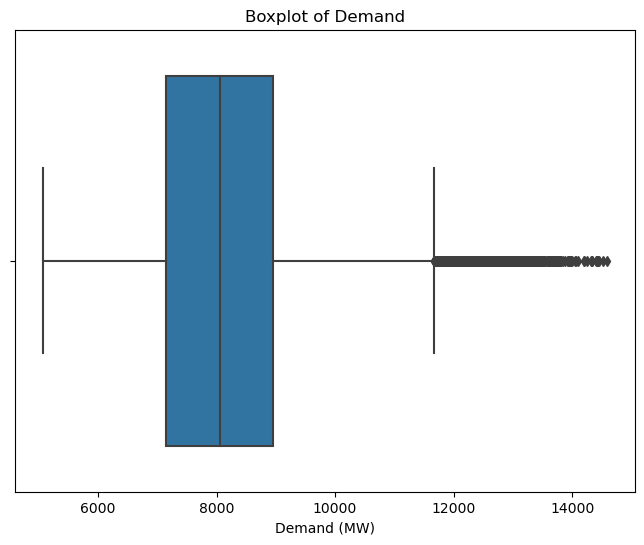

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_demand, x="demand")
plt.title("Boxplot of Demand")
plt.xlabel("Demand (MW)")
plt.show()

distribution of demand seems somewhat right skewed, while most demand values lie below 12,000 MW, a small number of instances exhibit higher demand levels. In general, it seems that demand usually hovers around 8,000 MW but can occasionally spike.

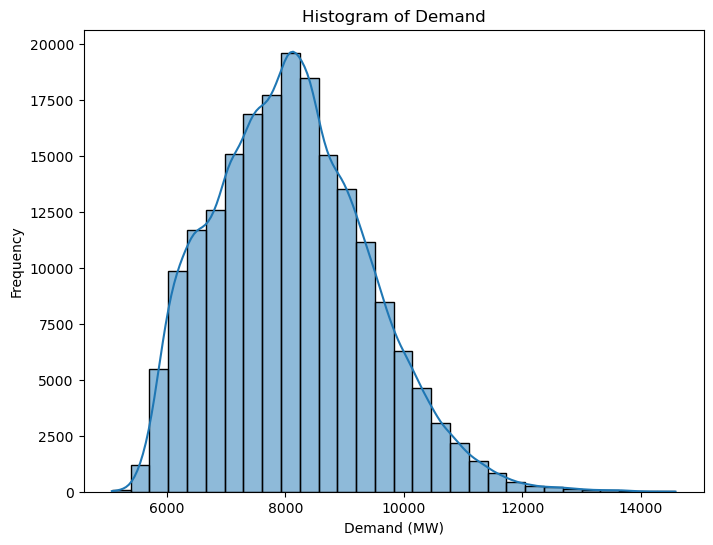

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df_demand["demand"], bins=30, kde=True)
plt.title("Histogram of Demand")
plt.xlabel("Demand (MW)")
plt.ylabel("Frequency")
plt.show()

The histogram comfirms the right-skewness nature of the demand data. The long right tail indicates that the occasional spike has demands that are significantly higher than the average. Electricity grid planners may need to account for occasional high demand spikes evem if they occur less frequently.

Let's look at the demand of each year

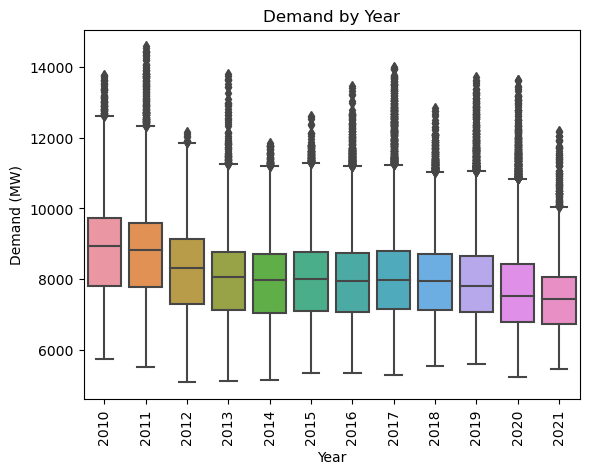

In [21]:
df_demand["year"] = df_demand["datetime"].dt.year
ax = sns.boxplot(data=df_demand, x="year", y="demand")
plt.title("Demand by Year")
plt.xlabel("Year")
plt.ylabel("Demand (MW)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [22]:
df_demand.head(-1)

,datetime,demand,year
0,2010-01-01 00:00:00,8038.00,2010
1,2010-01-01 00:30:00,7809.31,2010
2,2010-01-01 01:00:00,7483.69,2010
3,2010-01-01 01:30:00,7117.23,2010
4,2010-01-01 02:00:00,6812.03,2010
...,...,...,...
196507,2021-03-17 21:30:00,7503.12,2021
196508,2021-03-17 22:00:00,7419.77,2021
196509,2021-03-17 22:30:00,7417.91,2021
196510,2021-03-17 23:00:00,7287.32,2021


Similar to the Temperature data, the Demand data only goes up to March 2021, therefore the distribution for Year 2021 is most likely affected by the incomplete yearly data.

There may be a downward trend but too difficult to tell just from this

Let's look at the demand throughout the day but only use data up to the year 2020

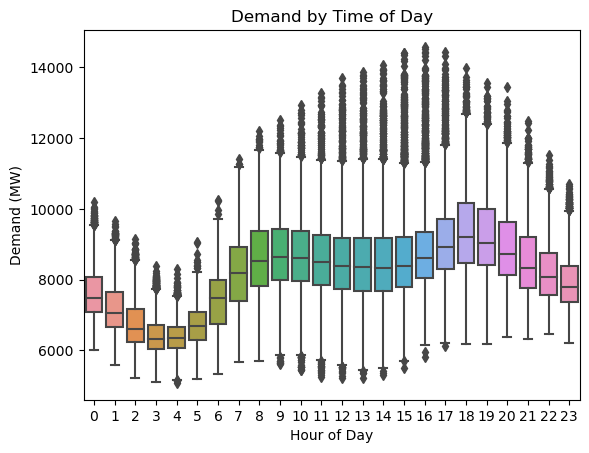

In [23]:
df_demand["hour"] = df_demand["datetime"].dt.hour

# Only using data up to 2020
ax = sns.boxplot(data=df_demand[df_demand["year"] < 2021], x="hour", y="demand")
plt.title("Demand by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.show()

- There is a clear daily cycle where demand starts low in the early morning, then rises during working hours and peaks in the afternoon.
- The high variability and presence of outliers during the peak hours may indicate irregular peak temperature from season to season
- Very stable IQR during peak hours

Judging from the graphs, we may assume that Demand and temperature could be correlated 

## Population

In [24]:
df_pop = pd.read_excel(
    "../data/Population/Population his.xlsx", sheet_name="Table 2", skiprows=4
)

In [25]:
df_pop.head()

,Sex,State/Territory,1901,1902,1903,1904,1905,1906,1907,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Male,NSW,713414.0,728613.0,742240.0,756401.0,773677.0,791555.0,813030.0,826749.0,...,3626400.0,3674410.0,3724215.0,3776574.0,3833807.0,3896830.0,3950763.0,3999452.0,4030710.0,4025393.0
1,Male,Vic.,604272.0,603923.0,600082.0,596203.0,595460.0,597378.0,602736.0,606736.0,...,2796315.0,2856419.0,2915277.0,2977200.0,3051056.0,3116504.0,3178223.0,3236531.0,3273674.0,3237594.0
2,Male,Qld,279644.0,284338.0,285192.0,289246.0,291403.0,294306.0,295844.0,303064.0,...,2278629.0,2319267.0,2349563.0,2374439.0,2403173.0,2443150.0,2481008.0,2521333.0,2558538.0,2585543.0
3,Male,SA,178878.0,176685.0,175766.0,176186.0,178747.0,182260.0,184420.0,190516.0,...,820600.0,827964.0,835164.0,841522.0,846877.0,854336.0,863034.0,873494.0,884465.0,891067.0
4,Male,WA,115391.0,125513.0,132595.0,140277.0,146013.0,148997.0,147620.0,148162.0,...,1223614.0,1254322.0,1266894.0,1276698.0,1281968.0,1295903.0,1310728.0,1331167.0,1357131.0,1376317.0


In [26]:
# Transpose the DataFrame
df_pop = df_pop.set_index("State/Territory").transpose()

# Filter for NSW and 'person' (both sexes combined, assuming that 'person' is represented in the dataset)
df_pop = df_pop[["NSW"]]
df_pop = df_pop.iloc[:, 2:]

In [27]:
df_pop.head()

State/Territory,NSW
Sex,Person
1901,1361736.0
1902,1389085.0
1903,1413768.0
1904,1438980.0


In [28]:
# Remove the row that contains the 'Sex' and 'Person' labels
df_pop = df_pop.iloc[1:]
df_pop.head()

State/Territory,NSW
1901,1361736.0
1902,1389085.0
1903,1413768.0
1904,1438980.0
1905,1470298.0


In [29]:
df_pop.columns = ["Population"]
df_pop.index.name = "Year"
df_pop = df_pop.reset_index()
df_pop.head()

,Year,Population
0,1901,1361736.0
1,1902,1389085.0
2,1903,1413768.0
3,1904,1438980.0
4,1905,1470298.0


In [30]:
df_pop.describe()

,Year
count,121.000000
mean,1961.000000
std,35.073732
min,1901.000000
25%,1931.000000
50%,1961.000000
75%,1991.000000
max,2021.000000


In [31]:
df_pop.isnull().sum()

Year          0
Population    0
dtype: int64

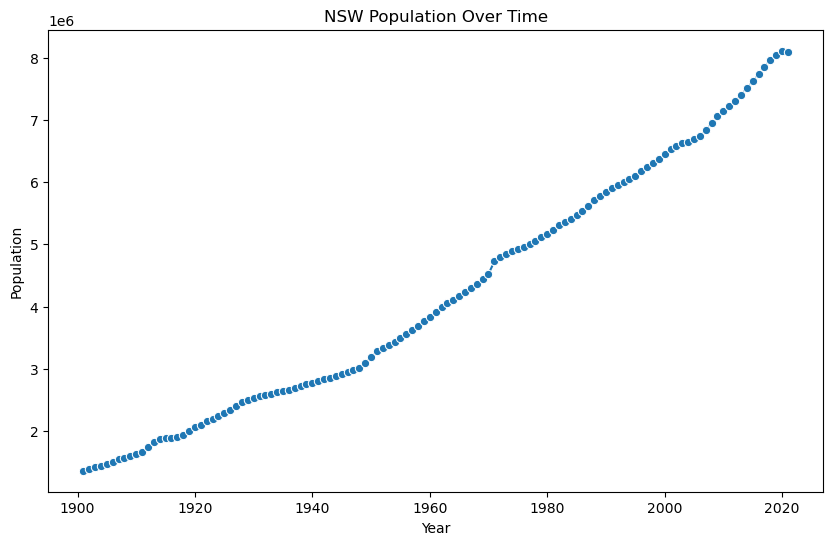

In [32]:
# Plotting a line graph to visualize population over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Population", data=df_pop, marker="o")
plt.title("NSW Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

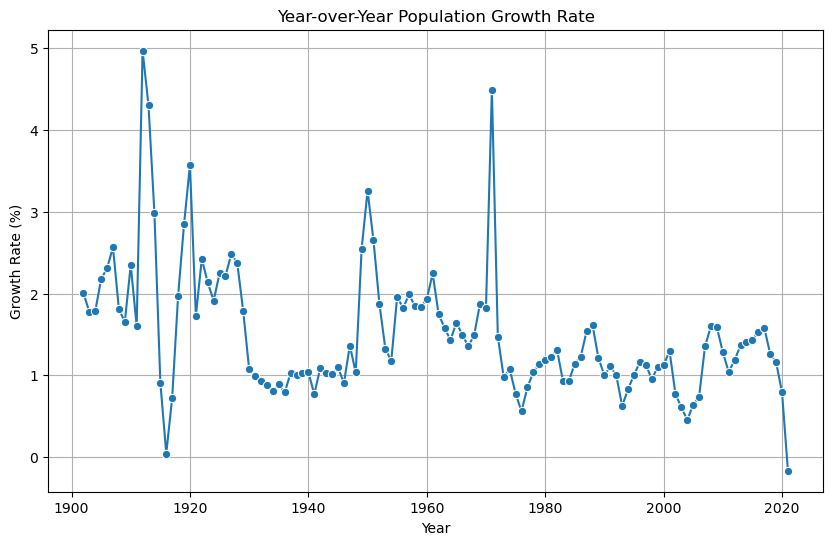

In [36]:
df_pop["Growth_Rate"] = df_pop["Population"].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Growth_Rate", data=df_pop, marker="o")
plt.title("Year-over-Year Population Growth Rate")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()

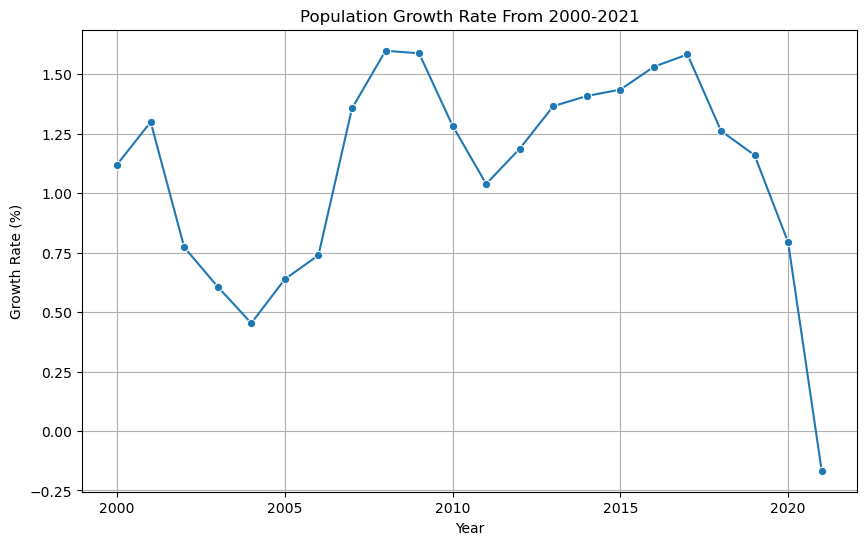

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Growth_Rate", data=df_pop[df_pop["Year"] >= 2000], marker="o")
plt.title("Population Growth Rate From 2000-2021")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()